# Disciplina: Processamento Digital de Sinais
# Trabalho: Ideal Continuous-Time Lowpass Filtering Using a Discrete-Time Lowpass Filter
### Alunos: MATHEUS MACÁRIO DOS SANTOS, MARIA EDUARDA CARDOSO ACIOLE, RAFAEL RAMOS PIMENTEL SANTANA, RENALVO ALVES FERREIRA JÚNIOR


O trabalho apresenta a implementação e análise de um sistema de filtragem digital passa-baixa ideal, baseado no processamento digital de sinais. O sistema desenvolvido demonstra o processo completo de amostragem, filtragem e reconstrução de sinais contínuos, utilizando técnicas modernas de processamento digital.

O sistema foi projetado para processar um sinal de entrada composto por múltiplas frequências, demonstrando claramente os efeitos da filtragem digital no domínio do tempo e da frequência.

O sinal de entrada foi construído através da superposição de quatro componentes senoidais com frequências de 10 Hz, 50 Hz, 100 Hz e 200 Hz, e amplitudes respectivas de 1.0, 0.5, 0.3 e 0.2.

Esta composição foi escolhida para demonstrar o comportamento do filtro passa-baixa ideal com frequência de corte em 75 Hz. 

A função create_input_signal foi implementada para gerar este sinal complexo, utilizando a função seno e o princípio da superposição linear.

O processo de amostragem do sinal contínuo foi realizado com uma frequência de amostragem de 1000 Hz, resultando em um período de amostragem de 1 milissegundo. Esta taxa foi escolhida para satisfazer adequadamente o critério de Nyquist, sendo significativamente maior que o dobro da maior frequência presente no sinal (200 Hz). 

A função sample_signal implementa este processo utilizando interpolação linear para garantir uma representação precisa do sinal nos pontos de amostragem.

O principal do sistema é o filtro passa-baixa ideal, implementado na função ideal_lowpass_filter. Este filtro opera no domínio da frequência, utilizando a Transformada Rápida de Fourier (FFT) para converter o sinal do domínio do tempo para o domínio da frequência. No domínio da frequência, o filtro aplica uma máscara binária que mantém apenas as componentes com frequência absoluta menor ou igual à frequência de corte (75 Hz). Após a aplicação da máscara, o sinal é convertido de volta para o domínio do tempo através da Transformada Inversa de Fourier (IFFT).


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [28]:
def create_input_signal(t, freqs, amps):
    """
    Cria um sinal de entrada composto por múltiplas frequências
    
    Args:
        t: Array de tempo
        freqs: Lista de frequências em Hz
        amps: Lista de amplitudes correspondentes
    """
    signal = np.zeros_like(t)
    for f, a in zip(freqs, amps):
        signal += a * np.sin(2 * np.pi * f * t)
    return signal

In [29]:
def sample_signal(t, signal, Ts):
    """
    Amostra o sinal contínuo
    
    Args:
        t: Array de tempo original
        signal: Sinal contínuo
        Ts: Período de amostragem
    """
    t_sampled = np.arange(t[0], t[-1], Ts)
    signal_sampled = np.interp(t_sampled, t, signal)
    return t_sampled, signal_sampled

In [30]:
def ideal_lowpass_filter(signal, cutoff_freq, fs):
    """
    Aplica um filtro passa-baixa ideal
    
    Args:
        signal: Sinal de entrada
        cutoff_freq: Frequência de corte em Hz
        fs: Frequência de amostragem em Hz
    """
    N = len(signal)
    freq = np.fft.fftfreq(N, d=1/fs)
    fft_signal = np.fft.fft(signal)
    
    # Cria máscara do filtro ideal
    mask = np.abs(freq) <= cutoff_freq
    filtered_fft = fft_signal * mask
    
    return np.fft.ifft(filtered_fft).real

In [31]:
# Parâmetros do sistema
duration = 1.0  # segundos
fs = 1000      # Frequência de amostragem em Hz
Ts = 1/fs      # Período de amostragem
t = np.linspace(0, duration, int(fs * duration))

# Criar sinal de entrada com múltiplas frequências
input_freqs = [10, 50, 100, 200]  # Hz
input_amps = [1.0, 0.5, 0.3, 0.2]
xc = create_input_signal(t, input_freqs, input_amps)

# Frequência de corte do filtro
fc = 75  # Hz

### O primeiro gráfico apresenta o sinal original no domínio do tempo, revelando sua natureza devido à superposição das diferentes frequências:

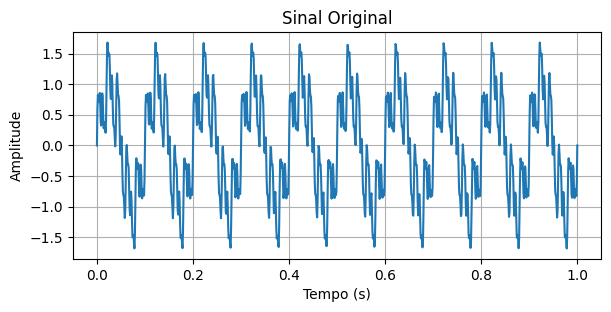

In [32]:
# 1. Sinal original e seu espectro
plt.figure(figsize=(15, 10))

# Plot do sinal no tempo
plt.subplot(3, 2, 1)
plt.plot(t, xc)
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

### O segundo gráfico mostra o espectro de frequência do sinal original, onde é possível identificar claramente as quatro componentes de frequência.

(-250.0, 250.0)

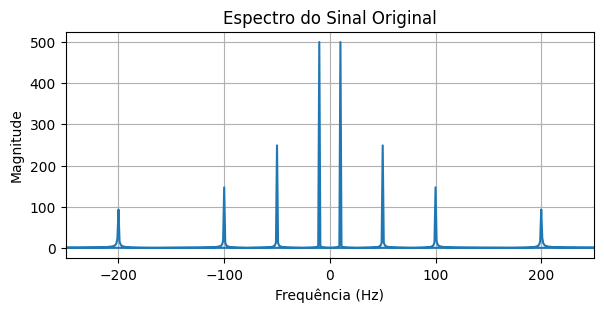

In [33]:
# Plot do espectro do sinal original
freq = np.fft.fftfreq(len(t), Ts)
plt.figure(figsize=(15, 10))
fft_xc = np.fft.fft(xc)
plt.subplot(3, 2, 2)
plt.plot(freq, np.abs(fft_xc))
plt.title('Espectro do Sinal Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-250, 250)

### O terceiro gráfico apresenta o sinal amostrado, utilizando um gráfico de hastes para enfatizar a natureza discreta do sinal digital.

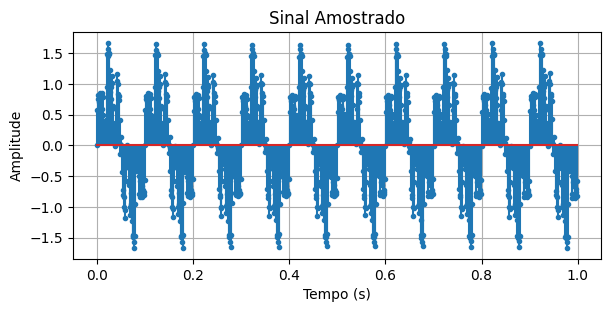

In [34]:
# 2. Sinal amostrado
t_sampled, x_sampled = sample_signal(t, xc, Ts)
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 3)
plt.stem(t_sampled, x_sampled, markerfmt='.')
plt.title('Sinal Amostrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

### O quarto gráfico mostra o sinal após a filtragem, evidenciando a suavização resultante da remoção das componentes de alta frequência.

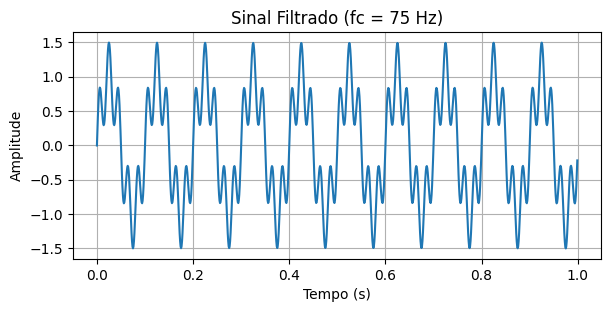

In [35]:
# 3. Aplicar filtro passa-baixa ideal
y_filtered = ideal_lowpass_filter(x_sampled, fc, fs)
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 4)
plt.plot(t_sampled, y_filtered)
plt.title(f'Sinal Filtrado (fc = {fc} Hz)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

### O quinto gráfico apresenta o espectro do sinal filtrado, onde se pode observar a eliminação das componentes acima da frequência de corte.



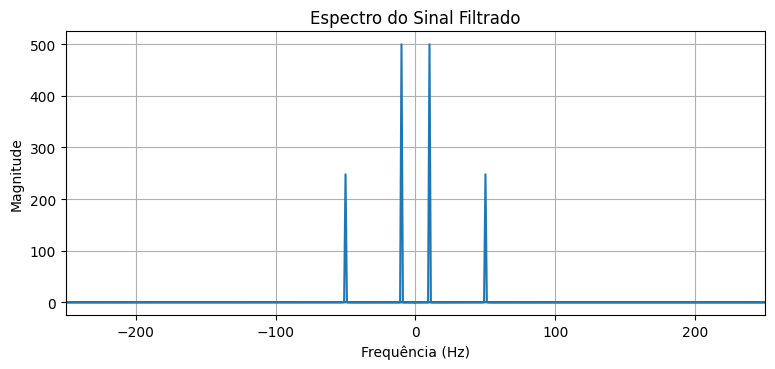

In [36]:
# 4. Espectro do sinal filtrado
fft_filtered = np.fft.fft(y_filtered)
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 5)
plt.plot(freq, np.abs(fft_filtered))
plt.title('Espectro do Sinal Filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-250, 250)
plt.tight_layout()
plt.show()

In [37]:
# Análise adicional: Comparação das componentes de frequência
print("\nAnálise das Componentes de Frequência:")
for f, a in zip(input_freqs, input_amps):
    print(f"Frequência: {f} Hz - Amplitude Original: {a}")
    if f <= fc:
        print(f"Status: Mantida (abaixo da frequência de corte)")
    else:
        print(f"Status: Removida (acima da frequência de corte)")


Análise das Componentes de Frequência:
Frequência: 10 Hz - Amplitude Original: 1.0
Status: Mantida (abaixo da frequência de corte)
Frequência: 50 Hz - Amplitude Original: 0.5
Status: Mantida (abaixo da frequência de corte)
Frequência: 100 Hz - Amplitude Original: 0.3
Status: Removida (acima da frequência de corte)
Frequência: 200 Hz - Amplitude Original: 0.2
Status: Removida (acima da frequência de corte)


A análise dos resultados demonstra a eficácia do filtro passa-baixa ideal. As componentes de 10 Hz e 50 Hz, que estão abaixo da frequência de corte, são preservadas com suas amplitudes originais. Por outro lado, as componentes de 100 Hz e 200 Hz são completamente removidas do sinal, resultando em uma forma de onda mais suave no domínio do tempo. Este comportamento é exatamente o esperado de um filtro passa-baixa ideal.
